In [1]:
import uproot
import vector
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sample_file = uproot.open("../ffNtuple_2Mu2E_500_0p25_2.root")
sample_file.classnames()
tree = sample_file['ffNtuplizer/ffNtuple']
branches = tree.arrays()
muon_p4 = vector.zip({"px": branches['muon_p4.fCoordinates.fX'],
                      "py": branches['muon_p4.fCoordinates.fY'],
                      "pz": branches['muon_p4.fCoordinates.fZ'],
                      "t": branches['muon_p4.fCoordinates.fT']}  )
electron_p4 = vector.zip({"px": branches['electron_p4.fCoordinates.fX'],
                      "py": branches['electron_p4.fCoordinates.fY'],
                      "pz": branches['electron_p4.fCoordinates.fZ'],
                      "t": branches['electron_p4.fCoordinates.fT']}  )
abs(branches["gen_pid"])==13

<Array [[False, False, ... False, False]] type='51626 * var * bool'>

In [3]:
two_muons_mask = branches['muon_n'] >= 2
two_electron_mask = branches['electron_n'] >= 2
fourlep_mask = two_muons_mask&two_electron_mask

In [4]:
two_muons_p4 = muon_p4[two_muons_mask]
two_electrons_p4 = electron_p4[two_electron_mask]
first_muon_p4 = two_muons_p4[:, 0]
second_muon_p4 = two_muons_p4[:, 1]
first_electron_p4 = two_electrons_p4[:, 0]
second_electron_p4 = two_electrons_p4[:,1]
sum_p4 = first_muon_p4 + second_muon_p4
sum_p4_ele = first_electron_p4 + second_electron_p4

m_1 = muon_p4[fourlep_mask][:,0]
m_2 = muon_p4[fourlep_mask][:,1]
e_1 = electron_p4[fourlep_mask][:,0]
e_2 = electron_p4[fourlep_mask][:,1]
lepmass = (m_1 + m_2 + e_1 + e_2).mass
print(lepmass)

[28.3, 24.9, 38.9, 86.1, 87.7, 14.4, 11.7, ... 70.7, 44.2, 206, 10.9, 23.2, 113]


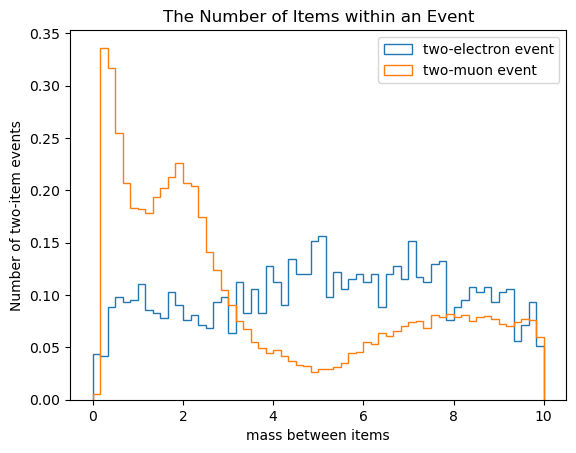

In [5]:
plt.hist(sum_p4_ele.mass, bins=60, range=(0,10), label = 'two-electron event',histtype='step', density=True)
plt.hist(sum_p4.mass, bins=60, range=(0,10), label = 'two-muon event',histtype='step', density=True)
plt.title('The Number of Items within an Event')
plt.xlabel('mass between items')
plt.ylabel('Number of two-item events')
plt.legend(loc="upper right")
plt.show()

In [6]:
print(fourlep_mask)

[False, False, False, False, False, False, ... True, True, False, False, False, True]


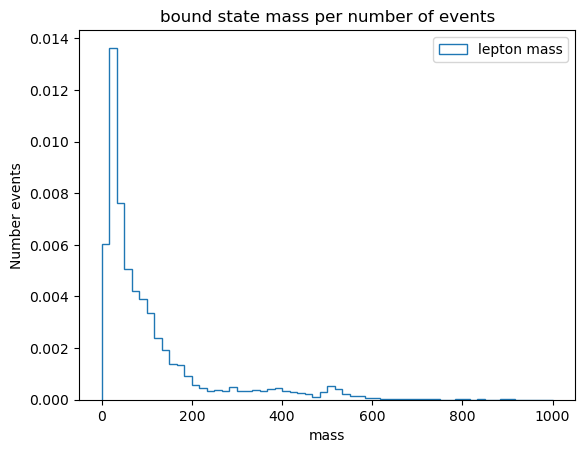

In [7]:
plt.hist(lepmass, bins=60, range=(0,1000), label = 'lepton mass',histtype='step', density=True)
plt.title('bound state mass per number of events')
plt.xlabel('mass')
plt.ylabel('Number events')
plt.legend(loc="upper right")
plt.show()